In [38]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Polygon
import rasterio as rio
from rasterio.features import geometry_mask
from osgeo import ogr
from osgeo import gdal
import numpy as np
from utils import plot_2dmatrix, create_map_of_valid_ids
import config_pop as cfg

In [39]:
path1 = "/scratch3/ldominiak/luca_pomelo_input_data/CHE/CHE_Census_Data/che_population_2000_2020.csv"
data = pd.read_csv(path1)

In [40]:
path2 = "/scratch3/ldominiak/luca_pomelo_input_data/CHE/CHE_Census_Data/che_subnational_admin_2000_2020.tif"
raster = rio.open(path2) # no data: 8888.0 # gewässer: 0

In [41]:
band1 = raster.read()
indexex_overview = np.unique(band1)
indexex_overview = indexex_overview.tolist() # liste mit allen pixelwerten
#indexex_overview = indexex_overview[2:]

In [42]:
cr_census_arr = [0,]
valid_ids = []

for i in range(len(data)):
    if np.any(data["GID"][i] in indexex_overview):
        cr_census_arr.append(data["P_2020"][i])
    else:
        pass
    valid_ids.append(np.where((data["GID"][i] == indexex_overview))[0][0])


cr_census_arr = np.asarray(cr_census_arr, dtype = 'float32')


cr_census = {i: val for i, val in enumerate(cr_census_arr)} # dict mit korrespondenzen zu coarse census aus wp daten
cr_census.pop(0)

0.0

In [43]:
cr_census

{1: 4011.933,
 2: 3651.9148,
 3: 2142.1252,
 4: 10853.959,
 5: 1333.5454,
 6: 544.1749,
 7: 2166.6606,
 8: 5538.6997,
 9: 3342.7134,
 10: 1559.0452,
 11: 6005.0293,
 12: 12605.518,
 13: 16187.063,
 14: 2191.7717,
 15: 15589.889,
 16: 4816.923,
 17: 1699.6904,
 18: 682.3326,
 19: 544.87714,
 20: 2731.3618,
 21: 1208.1604,
 22: 5695.439,
 23: 1611.3401,
 24: 2429.6182,
 25: 960.40906,
 26: 2341.4705,
 27: 359.20966,
 28: 14332.615,
 29: 839.9827,
 30: 4615.691,
 31: 10200.838,
 32: 314.85233,
 33: 1139.9475,
 34: 2188.2551,
 35: 1270.2773,
 36: 1629.0642,
 37: 1185.8038,
 38: 400.9961,
 39: 3070.1165,
 40: 346.02554,
 41: 1348.4907,
 42: 2816.9517,
 43: 1144.9045,
 44: 1443.8888,
 45: 2207.6943,
 46: 25016.404,
 47: 16829.34,
 48: 3604.4863,
 49: 222.4723,
 50: 316.10425,
 51: 1105.038,
 52: 5017.8965,
 53: 3565.0059,
 54: 4860.9014,
 55: 1090.0381,
 56: 2603.1482,
 57: 1078.6027,
 58: 500.09482,
 59: 2144.2139,
 60: 416.9933,
 61: 39.656555,
 62: 520.40015,
 63: 2344.2888,
 64: 9496.312

In [44]:
no_valid_ids = cfg.metadata["che"]["wp_no_data"]

In [45]:
no_valid_ids

[0, 8888.0]

In [46]:
CHE_raster_path = cfg.metadata["che"]["rst_wp_regions_path"]
raster = gdal.Open(CHE_raster_path)
geo_transform = raster.GetGeoTransform()
projection = raster.GetProjection()
geo_metadata = {"geo_transform": geo_transform, "projection": projection}

geo_metadata

{'geo_transform': (5.956249991169983,
  0.00083333333,
  0.0,
  47.81458334345,
  0.0,
  -0.00083333333),
 'projection': 'GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'}

2538


<Figure size 432x288 with 0 Axes>

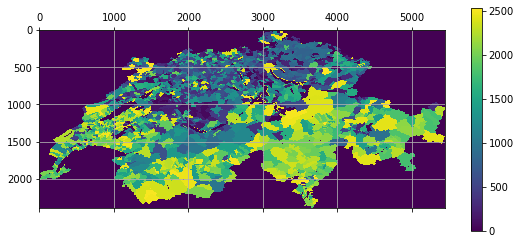

In [49]:
fine_regions = gdal.Open(CHE_raster_path).ReadAsArray().astype(np.uint32)

unique_list = list(np.unique(fine_regions)) ### mache liste aus validen ids
unique_list = unique_list[2:]### die ersten beiden braucht man nicht
unique_list.insert(0,0) 

h = fine_regions.shape[0]
w = fine_regions.shape[1]

relabel = np.zeros((h, w), dtype=np.int32)

for i,idx in enumerate(unique_list):
    relabel[fine_regions==idx] = i


print(len(np.unique(relabel)))

plot_2dmatrix(relabel)


<Figure size 432x288 with 0 Axes>

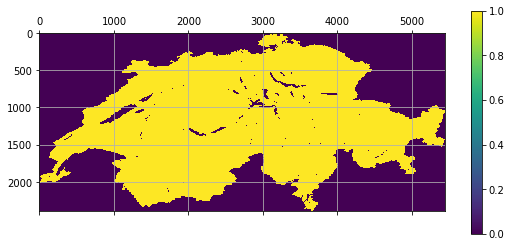

In [48]:
map_valid_ids = create_map_of_valid_ids(relabel, no_valid_ids)

np.unique(map_valid_ids)

plot_2dmatrix(map_valid_ids)